# 作業目標:

反向傳播演算法 - 通過建立多層的神經網路, 了解中間層權重值的更新

# 作業重點:

建立一個3 層神經網路, 通過中間層參數的變數，以對更多關係的組合進行分組

syn1 權值矩陣將隱層的組合輸出映射到最終結果，而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，


In [7]:
import numpy as np
 
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = x*(1-x) 

利用 deriv (derivative)做變數, 來分別指定方程式

'''    
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
 
    return 1/(1+np.exp(-x))

# 參數定義
# X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。
# y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
 
y = np.array([[0],
            [1],
            [1],
            [0]])
 
np.random.seed(1)
 
# randomly initialize our weights with mean 0 
# syn0 第一層權值
# syn1 第二層權值

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]
 
for j in range(60000):
 
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # 如何計算損失: 
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的損失。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的損失，除了確信損失很小時，它近似等於 l1_error 。
    
    
    
    
    
    '''
    作業: 
    新增
    l2_error 該值說明了神經網路預測時“損失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的損失，除了確信損失很小時，它近似等於預測輸出。
    '''
    '''
    損失計算: 數學函數輸出值減掉網路層的輸出值
    l2_error = ??
    '''
    l2_error=y-l2   
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
        l2_delta=l2_error * nonlin(l2,True) 
 
    '''
    可以參照 l1
    l2_delta = 損失跟輸出函數的乘積
    '''
      
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error)))+'\n')
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

L2_Error:0.4964100319027255
L1_Error:0.4964100319027255



<ipython-input-7-cecadf12f446>:15: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


L2_Error:0.3758073423071065
L1_Error:0.3758073423071065

L2_Error:0.37506758482244174
L1_Error:0.37506758482244174

L2_Error:0.3750355333589003
L1_Error:0.3750355333589003

L2_Error:0.37502410693022975
L1_Error:0.37502410693022975

L2_Error:0.37501824188099114
L1_Error:0.37501824188099114



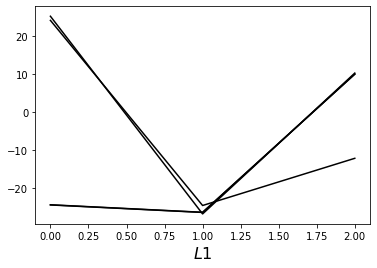

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

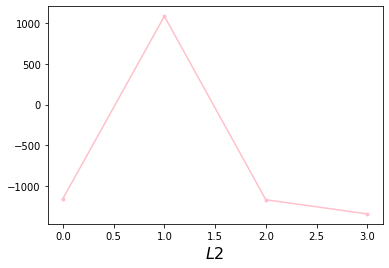

In [9]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [10]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[9.99951788e-01 4.89884706e-06 9.99953165e-01 9.99963994e-01]
 [6.75720971e-08 9.53566299e-17 6.67705667e-08 5.88442538e-08]
 [4.89139173e-07 9.99993183e-01 4.80598986e-07 1.00000000e+00]
 [1.59359779e-18 2.85530498e-06 1.50301251e-18 9.99808969e-01]]


In [11]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[0.00000000e+000]
 [4.99941309e-001]
 [1.02764701e-112]
 [0.00000000e+000]]
